In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!/opt/bin/nvidia-smi

Sun Oct 18 07:08:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null !apt-get update -qq 2>&1 > /dev/null !apt-get -y install -qq google-drive-ocamlfuse fuse from google.colab import auth auth.authenticate_user() from oauth2client.client import GoogleCredentials creds = GoogleCredentials.get_application_default() import getpass !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} &1 | grep URL vcode = getpass.getpass() !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `apt-get install -y -qq software-properties-common python-software-properties module-init-tools !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null !apt-get update -qq 2>&1 > /dev/null !apt-get -y install -qq google-drive-ocamlfuse fuse from google.colab import auth auth.authenticate_user() from oauth2client.client import GoogleCredentials creds = GoogleCredentials.get_application_default() import getpass !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} &1 | grep URL vcode = getpass.getpass() !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}'


In [ ]:
###导入相关包###
import torch
from torch import nn, optim
import torchvision
import torch.nn.functional as F

import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time


In [ ]:
# CIFAR10数据集下载
train_data = datasets.CIFAR10(root='/drive/',train=True,transform=transforms.ToTensor(),download=True)                        
test_data = datasets.CIFAR10(root='/drive/',train=False,transform=transforms.ToTensor(),download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print(train_data.data.size)
print(test_data.data.size)

153600000
30720000


(3, 32, 32)


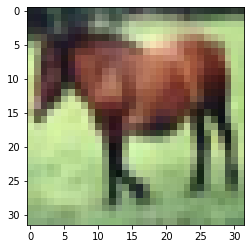

In [38]:
#图形可视化
temp=train_data[7][0].numpy()  
print(temp.shape)
temp=temp.transpose(1,2,0)
plt.imshow(temp)

In [74]:
#超参数定义
EPOCH = 150               # 训练epoch次数
BATCH_SIZE = 128         # 批训练的数量
LR = 0.1              # 学习率

# 使用DataLoader进行分批
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE)

# 使用ResNet34
model=torchvision.models.resnet34(pretrained=True)
# 使用DenseNet121
#model2=torchvision.models.densenet121(pretrained=True)

In [75]:
#损失函数:这里用交叉熵
criterion = nn.CrossEntropyLoss()
#优化器 这里用SGD
optimizer = optim.Adam(model.parameters(), lr=1e-3)
#device : GPU 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [76]:
for epoch in range(EPOCH):
  start_time=time.time()
  for i, data in enumerate(train_loader):
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)
        # 前向传播
      outputs = model(inputs)
        # 计算损失函数
      loss = criterion(outputs, labels)
        # 清空上一轮梯度
      optimizer.zero_grad()
        # 反向传播
      loss.backward()
        # 参数更新
      optimizer.step()
  print('epoch{} loss:{:.4f} time:{:.4f}'.format(epoch+1, loss.item(), time.time()-start_time))
      

epoch1 loss:0.7110 time:25.4311
epoch2 loss:0.5618 time:25.8468
epoch3 loss:0.4465 time:26.2226
epoch4 loss:0.2549 time:26.4863
epoch5 loss:0.2148 time:26.7859
epoch6 loss:0.4296 time:27.0152
epoch7 loss:0.1912 time:27.2151
epoch8 loss:0.1253 time:27.5953
epoch9 loss:0.1010 time:27.8830
epoch10 loss:0.1580 time:27.7228
epoch11 loss:0.0453 time:27.7790
epoch12 loss:0.0169 time:27.7801
epoch13 loss:0.0883 time:27.7327
epoch14 loss:0.1613 time:27.7430
epoch15 loss:0.1290 time:27.7329
epoch16 loss:0.0244 time:27.7351
epoch17 loss:0.1013 time:27.7334
epoch18 loss:0.0384 time:27.7214
epoch19 loss:0.0833 time:27.7305
epoch20 loss:0.0338 time:27.7269
epoch21 loss:0.0967 time:27.7397
epoch22 loss:0.1097 time:27.7420
epoch23 loss:0.0812 time:27.7322
epoch24 loss:0.0848 time:27.7417
epoch25 loss:0.3418 time:27.7439
epoch26 loss:0.0826 time:27.7318
epoch27 loss:0.0126 time:27.7275
epoch28 loss:0.0598 time:27.7072
epoch29 loss:0.0066 time:27.7310
epoch30 loss:0.0313 time:27.6988
epoch31 loss:0.0094

In [77]:
#保存训练模型
torch.save(model, 'cifar10_resnet18.pt')
#torch.save(model, 'cifar10_resnet34.pt')
#torch.save(model, 'cifar10_resnet50.pt')
#torch.save(model2, 'cifar10_densenet121.pt')
model = torch.load('cifar10_resnet18.pt')
#model = torch.load('cifar10_resnet34.pt')
#model = torch.load('cifar10_resnet50.pt')
#model2 = torch.load('cifar10_densenet121.pt')

In [80]:
# 测试
model.eval()
correct = 0
total = 0
for data in test_loader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # 前向传播
    out = model(images)
    #out2 = model2(images)
    _, predicted = torch.max(out.data, 1)
    #_, predicted2 = torch.max(out2.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    #correct2 += (predicted2 == labels).sum().item()

In [64]:
#输出识别准确率
print('10000测试图像 resnet34准确率:{:.4f}%'.format(100 * correct / total)) 

10000测试图像 resnet34准确率:81.6300%


In [81]:
#输出识别准确率
print('10000测试图像 resnet18准确率:{:.4f}%'.format(100 * correct / total)) 

10000测试图像 resnet18准确率:81.8800%
